#Topics covered:

- Overfitting and Underfitting:
    - underfitting: a model that is too simple
    - overfitting: a model that is not a good predictor
- Linear Regression - Least Squares
- DummyRegressor
- Polynomial Features 
- Regression Metrics (how good is your model)
    - R2 (R square) error: more common
    - Mean Absolute error
    - Mean Squared error

In [1]:
# let's read price of stock over time
def getXAndY():
    import pandas as pd
    df = pd.read_csv('stock.txt')
    
    # we need to do a reshape of the data because train_test_split 
    #expects a [[]] and the X is just one column []
    return(df['time'].values.reshape(-1,1),df['price'])

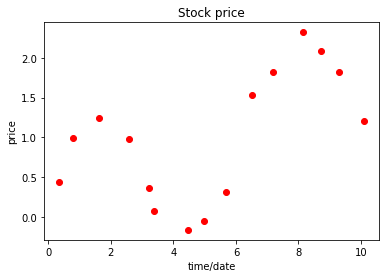

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(x,y)= getXAndY()   
plt.plot(x,y,'ro')
plt.ylabel('price')
plt.xlabel('time/date')
plt.title('Stock price')
plt.show()

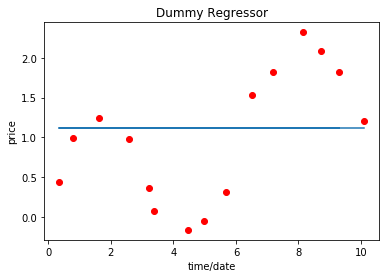

(0.0, -0.47808641863876811)

In [4]:
# let's make a model that always predict the mean: DummyRegressor
# r2_score: it's a linear regression scoring function with a best score = or close to 1. 
# For scoring: perfect fit = 1 (e.g. two parallel lines), bad = 0 (always predicts the same), 
# ugly = -1 (two orthogonal lines, predict the opposite)
def question1():
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics.regression import r2_score
    from sklearn.dummy import DummyRegressor
    
    (X,y)= getXAndY()
    
    # train_test_split with the default option assigns 75% of the points 
    # to train and 25% to test    
    # use random_state = 0 (or any number) to make sure your results are repeatable
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    
    # returns the mean
    dummyReg = DummyRegressor(strategy='mean').fit(X_train, y_train)
    
    # calculate our predicted values for train and test
    y_pred_train = dummyReg.predict(X_train)
    y_pred_test = dummyReg.predict(X_test)
    
    plt.plot(X,y,'ro')
    plt.plot(X_train,y_pred_train)
    plt.ylabel('price')
    plt.xlabel('time/date')
    plt.title('Dummy Regressor')
    plt.show()
    
    #compare the predicted values with the real ones
    q1 = r2_score(y_train, y_pred_train)
    q2 = r2_score(y_test, y_pred_test)
    return (q1,q2)

question1()

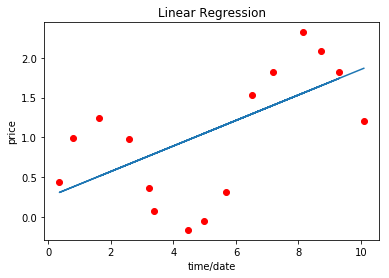

(0.42924577737495484, -0.45237103767627485)

In [5]:
# let's do a linear regression with a polynomial of degree = 1 ( a line)
def question2():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics.regression import r2_score
    import warnings
    warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
    
    (X,y)= getXAndY()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    
    plt.plot(X,y,'ro')
    plt.plot(X_train,y_pred_train)
    plt.ylabel('price')
    plt.xlabel('time/date')
    plt.title('Linear Regression')
    plt.show()
    
    q1 = r2_score(y_train, y_pred_train)
    q2 = r2_score(y_test, y_pred_test)
    return (q1,q2)

question2()
    

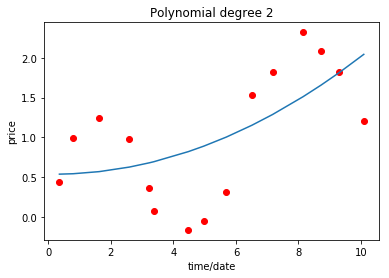

(0.45109980379480552, -0.06856983813998796)

In [6]:
# let's do a regression for a polynomial of degree 2 (y = ax^2 + bx + c)
# Turns the data into a polynomial form
# e.g. if we want to turn the data into a polynomial of degree 2:
# if we have one feature x0, it will convert it to: x0, x0^2
# for two features x1, x2, the data will convert to:  x0, x1, x0^2, x0*x1, x1^2
def question3():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures 
    from sklearn.model_selection import train_test_split
    from sklearn.metrics.regression import r2_score
    
    (X,y)= getXAndY()
    X_poly = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    y_plot = linreg.predict(X_poly)
    
    plt.plot(X,y,'ro')
    plt.plot(x,y_plot)
    plt.ylabel('price')
    plt.xlabel('time/date')
    plt.title('Polynomial degree 2')
    plt.show()
    
    q1 = r2_score(y_train, y_pred_train)
    q2 = r2_score(y_test, y_pred_test)
    return (q1,q2)

question3()

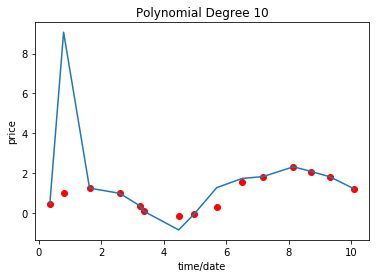

(0.99999986449675704, -38.876062172676896)

In [7]:
# let's do a linear regression for a polynomial of grade 10
# return r2 scores for the training and testing set
def question4():
    
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn.metrics.regression import r2_score
    
    (X,y)= getXAndY()
    
    X_poly = PolynomialFeatures(degree=10,include_bias=False).fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)
    y_plot = linreg.predict(X_poly)
    
    plt.plot(X,y,'ro')
    plt.plot(X,y_plot)
    plt.ylabel('price')
    plt.xlabel('time/date')
    plt.title('Polynomial Degree 10')
    plt.show()
    
    q1 = r2_score(y_train, y_pred_train)
    q2 = r2_score(y_test, y_pred_test)
    return (q1,q2)

question4()

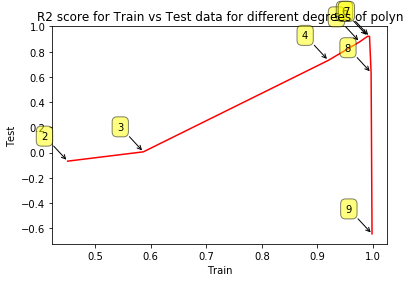

6

In [8]:
# let's do a for loop from degree 2 through 9 for the data
# capture the r2 scores for the test and training sets for each iteration
# return the degree at which you think it's not overfitting or underfitting (high values for r2 scores
# for both train and test sets)
# extra credit: plot the r2 scores, in the x axis the training set r2, 
# in the y axis the r2 results for the test set, and label each of the points

def question5():
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    from sklearn.metrics.regression import r2_score
    
    (X,y)= getXAndY()
    r2_train = []
    r2_test = []
    
    for i in range(2,10):
        X_poly = PolynomialFeatures(degree=i,include_bias=False).fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    
        linreg = LinearRegression().fit(X_train, y_train)
        
        q1 = r2_score(y_train, linreg.predict(X_train))
        q2 = r2_score(y_test, linreg.predict(X_test))
        
        r2_train.append(q1)
        r2_test.append(q2)
    
    labels = ['{0}'.format(i) for i in range(2,10)]

    plt.title("R2 score for Train vs Test data for different degrees of polyn")
    plt.plot (r2_train, r2_test, 'r-')
    plt.xlabel("Train")
    plt.ylabel("Test")
    
    for label, i, j in zip(labels, r2_train[:], r2_test[:]):
        plt.annotate(
            label,
            xy=(i, j), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.show()
    return (6) # seven is as good but maybe overfitting as new data comes

question5()